# Airbnb Market Trends Analysis in NYC

## Project Overview
In this project, I explore key trends within the Airbnb market by analyzing listing prices, room types, and review activity. The goal is to uncover valuable insights that could be useful for Airbnb hosts, investors, or those interested in the short-term rental market.

## Objectives
1. Analyze room type distribution to understand market offerings.
2. Calculate the average listing price.
3. Examine review trends over time to identify user engagement.
4. Summarize key metrics such as the earliest and latest review dates, number of private rooms, and average price.

## Data Overview
I work with three datasets:
- **airbnb_price.csv**: Contains price information for Airbnb listings.
- **airbnb_room_type.xlsx**: Contains details about the types of rooms offered (e.g., Private Room, Entire Home, etc.).
- **airbnb_last_review.tsv**: Contains the date of the most recent review for each listing.

# Step-by-Step Analysis

## Step 1: Import Libraries
I start by importing the necessary libraries for data manipulation and visualization.

In [24]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Loading the Data
I load the data from the provided CSV, Excel, and TSV files into separate Pandas DataFrames.

In [25]:
# Load the datasets
price = pd.read_csv('/content/airbnb_price.csv')
room = pd.read_excel('/content/airbnb_room_type.xlsx')
review = pd.read_csv('/content/airbnb_last_review.tsv', sep='\t')

## Step 3: Handling Missing Values
Before proceeding, I clean the data to handle missing values.

In [26]:
# Fill missing values
room['description'] = room['description'].fillna('No description available')
review['host_name'] = review['host_name'].fillna('Unknown')

## Step 4: Data Inspection
I inspect the first few rows of each DataFrame to verify that the data has been loaded correctly.

In [27]:
# Inspect first few rows
print(price.head())
print(room.head())
print(review.head())

   listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown
   listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt
   listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24 2019
4        5238          Ben 

## Step 5: Merging the DataFrames
To work with all the data together, I merge the `price`, `room`, and `review` DataFrames on the common `listing_id` column.

In [36]:
# Merge the DataFrames on 'listing_id'
merged_df = pd.merge(price, room, on='listing_id')
merged_df = pd.merge(merged_df, review, on='listing_id')

# Display the merged DataFrame
merged_df.head()

,listing_id,price,nbhood_full,description,room_type,host_name,last_review
0,2595,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Jennifer,May 21 2019
1,3831,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,July 05 2019
2,5099,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,June 22 2019
3,5178,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Shunichi,June 24 2019
4,5238,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,June 09 2019


## Step 6: Converting and Finding Review Dates
The `last_review` column is converted to the correct datetime format to enable analysis of review trends. I also calculate the first and last review dates in the dataset.



In [37]:
# Convert and calculate review dates
merged_df['last_review'] = pd.to_datetime(merged_df['last_review'], errors='coerce')
first_reviewed = merged_df['last_review'].min()
last_reviewed = merged_df['last_review'].max()

print(f"First reviewed date: {first_reviewed}")
print(f"Last reviewed date: {last_reviewed}")

First reviewed date: 2019-01-01 00:00:00
Last reviewed date: 2019-07-09 00:00:00


## Step 7: Counting Listings by Room Type
I first clean the `room_type` column by converting all text to lowercase to ensure consistency. Then, I count the total number of listings for each room type.

In [45]:
# Clean and count listings by room type
merged_df['room_type'] = merged_df['room_type'].str.lower()
room_type_counts = merged_df['room_type'].value_counts()
for room_type, count in room_type_counts.items():
    print(f"Number of {room_type} listings: {count}")

Number of entire home/apt listings: 13266
Number of private room listings: 11356
Number of shared room listings: 587


## Step 8: Visualizing Room Type Distribution
I visualize the distribution of different room types in the dataset using a bar chart. This helps us understand which types of rooms are most common on Airbnb.

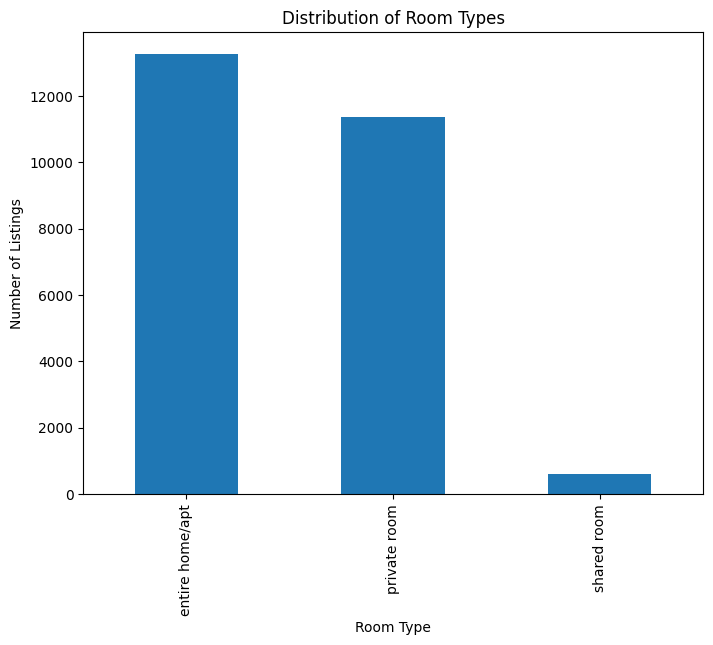

In [46]:
# Visualize room type distribution
room_type_counts = merged_df['room_type'].value_counts()

# Bar plot for room type distribution
room_type_counts.plot(kind='bar', figsize=(8, 6), title='Distribution of Room Types')
plt.ylabel('Number of Listings')
plt.xlabel('Room Type')
plt.show()

## Step 9: Calculating the Average Price
To calculate the average listing price, I clean the price column by removing unwanted text and converting it to numeric values. The average price is then computed and rounded to two decimal places.

In [47]:
# Calculate average price
merged_df['price'] = merged_df['price'].replace(' dollars', '', regex=True).astype(float)
average_price =  merged_df['price'].mean()

# Round the average price to two decimal places
average_price = round(average_price,2)

print(f"Average price of listing: {average_price}")

Average price of listing: 141.78


## Step 10: Visualizing Review Trends Over Time
I analyze the number of reviews over time to track user engagement trends. A line plot is used to visualize the number of reviews per day.

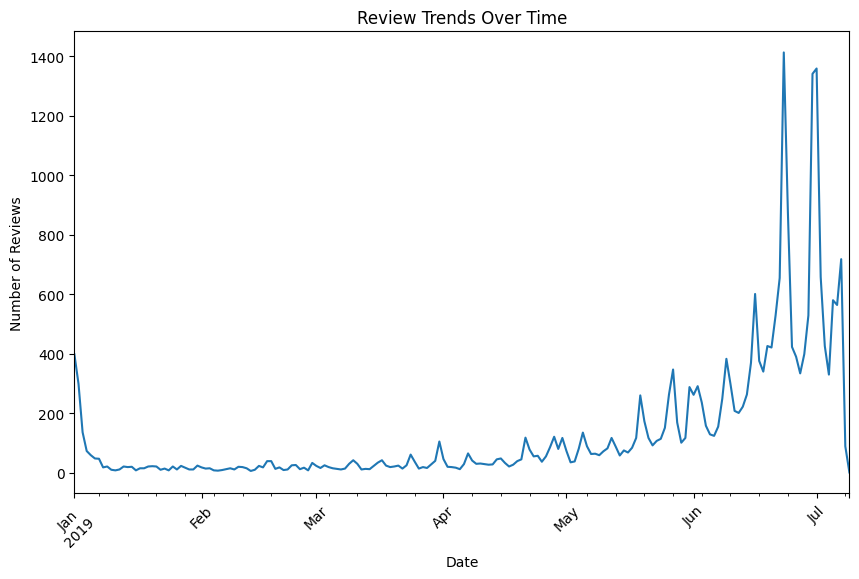

In [48]:
# Visualize review trends over time
reviews_over_time = merged_df.groupby('last_review').size()

# Line plot for review trends over time
reviews_over_time.plot(kind='line', figsize=(10, 6), title='Review Trends Over Time')
plt.ylabel('Number of Reviews')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

## Step 11: Summarizing Key Metrics
Finally, I summarize the key insights (first and last review dates, number of private rooms, and average price) into a single-row DataFrame called review_dates.

In [49]:
# Create summary DataFrame
data = {
    'first_reviewed': [first_reviewed],
    'last_reviewed': [last_reviewed],
    'entire_home_apt_count': [room_type_counts.get('entire home/apt', 0)],
    'private_room_count': [room_type_counts.get('private room', 0)],
    'shared_room_count': [room_type_counts.get('shared room', 0)],
    'average_price': [average_price]
}

review_dates = pd.DataFrame(data)
print(review_dates)

  first_reviewed last_reviewed  entire_home_apt_count  private_room_count  \
0     2019-01-01    2019-07-09                  13266               11356   

   shared_room_count  average_price  
0                587         141.78  


## Key Findings

### 1. Room Type Distribution
- Entire home/apt is the most common room type, with a total of 13,266 listings.
- Private rooms come in second with 11,356 listings, followed by shared rooms with 587 listings.
- This indicates a strong preference for renting entire homes or apartments, while private rooms also hold a significant share.

### 2. Average Price
- The average price for Airbnb listings is approximately $141.78.
- This serves as a benchmark for hosts to competitively price their listings.

### 3. Review Trends
- User engagement peaks in mid-June, likely due to summer travel.
- Engagement drops slightly toward the end of July, indicating the start of off-peak travel periods.

### 4. Summary Table
| First Reviewed | Last Reviewed | Entire Home/Apt Count | Private Room Count | Shared Room Count | Average Price |
| -------------- | ------------- | --------------------- | ------------------ | ----------------- | ------------- |
| 2019-01-01     | 2019-07-09    | 13,266               | 11,356            | 587               | $141.78       |

## Conclusion
This project provides valuable insights into the Airbnb market, including room type distribution, pricing, and review trends. These findings can guide Airbnb hosts, investors, and analysts in making informed decisions about the short-term rental market.

By combining data analysis and visualization, this project demonstrates essential skills in data manipulation, cleaning, and presentation.